# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Resources](#resources)
- [Conclusion](#conclusion)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [3]:
df = pd.read_csv('datasets/ab_data.csv') # Read ab_data.csv and store it into pandas dataframe

**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0] # Get the count of all rows in dataframe

294478

**c.** The number of unique users in the dataset.

In [5]:
df['user_id'].nunique() # Count of unique users

290584

**d.** The proportion of users converted.

In [6]:
df.query('converted == 1')['user_id'].nunique() / df['user_id'].nunique() # The proportion of users tha payed for the product

0.12104245244060237

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:
df[((df['landing_page'] != 'new_page') & (df['group'] == 'treatment')) | ((df['landing_page'] == 'new_page') & (df['group'] != 'treatment'))].shape[0]
# Rows that with landing_page that doesn't fit with the group, should be removed later

3893

**f.** Do any of the rows have missing values?

In [8]:
df.isna().sum() # Count of rows that has missing values

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop(df[((df['landing_page'] != 'new_page') & (df['group'] == 'treatment')) | ((df['landing_page'] == 'new_page') & (df['group'] != 'treatment'))].index, inplace=False)

In [10]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique() # Count of unique users

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2['user_id'].duplicated()]['user_id'] # Get the duplicated user id

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [13]:
df2[df2['user_id'] == 773192] # Display the times that user id 773192 got duplicated

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [14]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop(1899, inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>



In [15]:
pc_all = df2[df2['converted'] == 1]['user_id'].shape[0] / df2['user_id'].shape[0] # Propability of users that bought the product
pc_all

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [44]:
pc_control = df2[df2['group'] == 'control']['converted'].mean()
# Propability of users that bought the product from the control group
pc_control

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [43]:
pc_treatment = df2[df2['group'] == 'treatment']['converted'].mean()
# Propability of users that bought the product from the treatment group
pc_treatment

0.11880806551510564

In [45]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = pc_treatment - pc_control
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [19]:
df2[df2['landing_page'] == 'new_page'].shape[0] / df2['user_id'].shape[0] # Propability of recieving the new page

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**Control group shows higher conversion than treatment group but the difference is not significant.**

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

<center>
$H_0=p_{𝒏𝒆𝒘}≤p_{𝒐𝒍𝒅}$<br>
$H_1=p_{𝒏𝒆𝒘}>p_{𝒐𝒍𝒅}$
</center>

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

In [20]:
p_new = df2['converted'].mean() # probability of user converting
p_old = p_new # we assume in the null hypothesis that P_new and P_new and P_population are all equal so we assign p_old as p_new
len_new = len(df2[df2['group'] == 'treatment']) # number of users in treatment group
len_old = len(df2[df2['group'] == 'control']) # number of users in control group

In [21]:
p_diffs = [] # assign array to store results of difference between new_samples and old_samples
new_samples = np.random.binomial(len_new, p_new, 10000) / len_new # Simulate random samples for number of conversions of treatment group using P_new
old_samples = np.random.binomial(len_old, p_old, 10000) / len_old # Same as above but for P_old
p_diffs = new_samples - old_samples # Get the difference between new_samples and old_samples

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [22]:
# Simulating the probability of cr for treatment group under null hypothesis from normal distribution using population cr with 10000 iterations
null_vals_new = np.random.normal(pc_all, p_diffs.std(), 10000) 
null_vals_new.mean()

0.11960947055119243

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [23]:
# Doing the same thign above but for control group
null_vals_old = np.random.normal(pc_all, p_diffs.std(), 10000)
null_vals_old.mean()

0.11958420067900566

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [24]:
# Gathering the len of treatment group (number of users in treatment group)
len_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [25]:
# Gathering the len of control group (number of users in control group)
len_old

145274

In [55]:
# Difference between probability of cr for treatment group under null hypothesis and probability of cr for control group under null hypothesis
round(null_vals_new.mean() - null_vals_old.mean())

0

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>


In [56]:
new_page_converted = np.random.choice([0, 1], size=len_new, p=[1-null_vals_new.mean(), null_vals_new.mean()])
# Simulating sample of conversions with treatment group propability under the null hypothesis

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [57]:
old_page_converted = np.random.choice([0, 1], size=len_old, p=[1-null_vals_old.mean(), null_vals_old.mean()])
# Simulating sample of conversions with control group propability under the null hypothesis

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [29]:
diff_page_converted = new_page_converted.mean() - old_page_converted.mean() # The difference of both the simulated samples for both groups
diff_page_converted.mean()

0.0011472949163023605


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [31]:
p_diffs = [] # Assign array to store results of difference between new_samples and old_samples
samples_new = np.random.binomial(len_new, null_vals_new.mean(), 10000) / len_new # Simulating samples for number of conversions using P_new under null hypothesis 
samples_old = np.random.binomial(len_old, null_vals_old.mean(), 10000) / len_old # Same as above but for P_old under null hypothesis
p_diffs = samples_new - samples_old # Store the samples cr mean differences

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

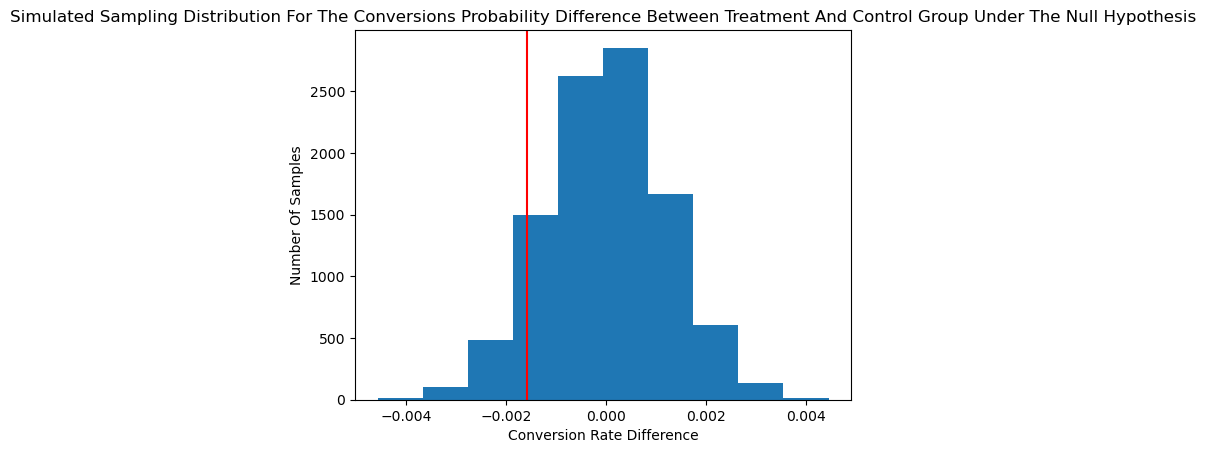

In [46]:
plt.hist(p_diffs) # Plotting p_diffs using histogram
plt.title('Simulated Sampling Distribution For The Conversions Probability Difference Between Treatment And Control Group Under The Null Hypothesis')
plt.xlabel('Conversion Rate Difference')
plt.ylabel('Number Of Samples')
plt.axvline(obs_diff, color='red') # show the observed difference in the histogram

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [47]:
p_value = (np.array(p_diffs) > obs_diff).mean() # Calculate the proportion of data that lies above the observed difference
p_value

0.9075

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
  - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)".

>**Its called the P-Value, and by comparing the P-Value with Type I error rate (0.05) we fail to reject the null hypothesis.**

In [58]:
p_value - 0.05 # Comparing P-Value with Type I error rate (0.05)

0.8574999999999999



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [59]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2[df2['landing_page'] == 'old_page']['converted'].sum()

# number of conversions with the new_page
convert_new = df2[df2['landing_page'] == 'new_page']['converted'].sum()

# number of individuals who were shown the old_page
n_old = df2[df2['landing_page'] == 'old_page']['user_id'].shape[0]

# number of individuals who received new_page
n_new = df2[df2['landing_page'] == 'new_page']['user_id'].shape[0]

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [60]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
count_array = [convert_new, convert_old]
nobs_array = [n_new, n_old]
z_score, p_value = sm.stats.proportions_ztest(count_array, nobs_array, alternative='larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Based on our result from the A/B test from the P-Value using null hypothesis testing and two-samples Z-test we fail to reject the null hypothesis**

In [61]:
p_value - 0.05

0.8550583127590244

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

- **We should preform logistic regression.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [62]:
df2['intercept'] = 1
ab_page = pd.get_dummies(df['group'])
ab_page.drop(columns='control', inplace=True)
df2 = df2.join(ab_page)
df2.rename(columns={'treatment' : 'ab_page'}, inplace=True)

**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [63]:
mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [64]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:               8.077e-06
Time:                        07:37:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


>**In Part II we have calculated we have simulated sampling distribution with bootstrapping to predict the answer for whole population but in here we are just using one sample data.**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**We can add the timestamp to see in which time there is higher conversions rate but it could cause multicollinearity which is hard to deal with.**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [66]:
df_country = pd.read_csv('datasets/countries.csv')

In [67]:
df_merged = df2.sort_values('user_id', ascending=True).join(df_country.sort_values('user_id', ascending=True)['country'])

In [68]:
vDummy_country = pd.get_dummies(df_merged['country'])
vDummy_country.drop(columns=['CA'], inplace=True)
df_merged = df_merged.join(vDummy_country)

In [76]:
df_merged['intercept'] = 1
mod = sm.Logit(df_merged['converted'], df_merged[['intercept', 'UK', 'US']])
res = mod.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.7363
Date:               2023-06-27 09:39 BIC:              212814.4753
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.51365    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0197    0.0231  -87.5238  0.0000  -2.0650  -1.9745
UK             0.0297    0.0258    1.1514  0.2496  -0.0208   0.0802
US             0.0234    0.0241    0.9716  0.3312  -0.0238   0.0706
==================================================================

"""

>**Based on the results from the regrission model we fail to reject the null hypotheses, and we can see that the countries have some effect on the conversion rate but its not very significant.**

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [72]:
df_merged['ab_UK'] = df_merged['ab_page'] * df_merged['UK']
df_merged['ab_US'] = df_merged['ab_page'] * df_merged['US']

In [78]:
mod = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'US', 'ab_UK', 'ab_US']])
res = mod.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366111
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212784.1015
Date:               2023-06-27 09:56 BIC:              212847.5794
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.30942    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0497    0.0331  -61.9451  0.0000  -2.1145  -1.9848
ab_page        0.0589    0.0462    1.2755  0.2021  -0.0316   0.1494
UK             0.0651    0.0368    1.7666  0.0773  -0.0071   0.1373
US             0.0647    0.0345    1.8777  0.0604  -0.0028   0.1323
ab_UK         -0.0699    0.0516   -1.3554  0.1753  -0.1710   0.0312
ab_US         -0.0818    0.0482   -1.6981  0.0895  -0.1762   0.0126
==================================================================

"""

>**Based on the P-Value of ab_page we fail to reject the null, and we can see that the country have significant effect on conversions but the page significant like the country.**

<a id='conclusion'></a>
## Conclusion
>**At every A/B Test done using sampling distribution, Z-Test, logistic regression we concluded that the new design should not be implemented we should keep the old website.**

<a id='resources'></a>
## Resoruces

>**matplotlib: https://matplotlib.org/stable/index.html  
pandas: https://pandas.pydata.org/docs/index.html  
Numpy: https://numpy.org/doc/stable/index.html  
statsmodels: https://www.statsmodels.org/stable/index.html**